In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# ML libraries
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error
import tensorflow as tf

## Data Preparation

In [3]:
# For target trend from original dataset target variable
target_trend = pd.read_csv('Target_trend.csv',index_col=0)
test_index = target_trend.index
target_trend.index = pd.to_datetime(test_index)

# From CNN model prediction
CNN_test = pd.read_csv('CNN_pred.csv',index_col=0)
CNN_test.index = pd.to_datetime(test_index)

# From ARIMA model prediction
ARIMA_test = pd.read_csv('ARIMA_pred.csv',index_col=0)
ARIMA_test.index = pd.to_datetime(test_index)

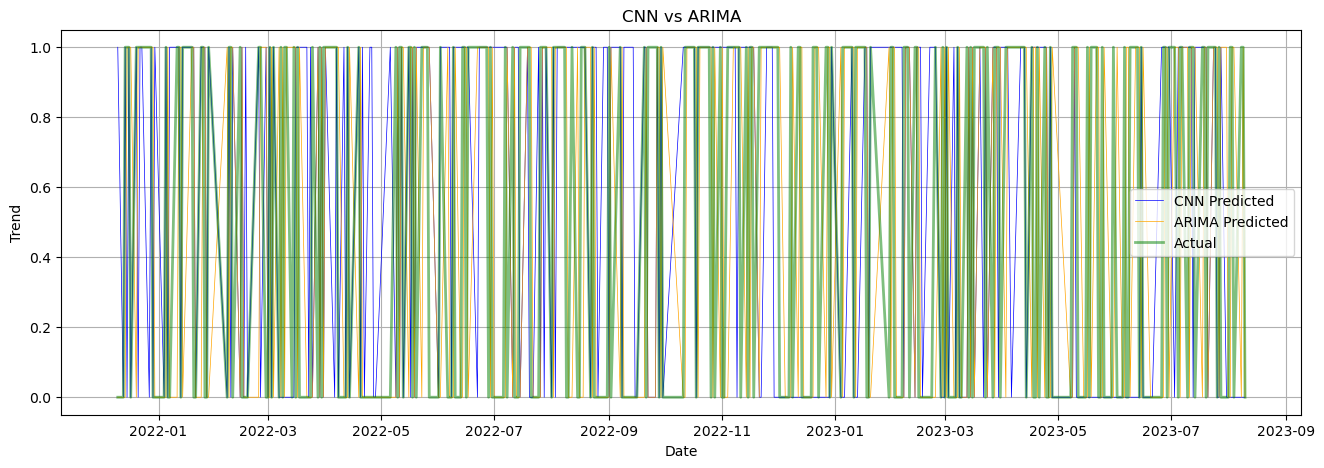

In [4]:
# Finally plotting all the dataset
plt.figure(figsize=(16,5))
plt.grid(True)
plt.plot(CNN_test, color = 'blue', label = 'CNN Predicted', linewidth=0.5)
plt.plot(ARIMA_test, color = 'orange', label = 'ARIMA Predicted', linewidth=0.5)
plt.plot(target_trend, color = 'green', label = 'Actual', alpha=0.5, linewidth=2)
plt.title('CNN vs ARIMA')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.show()

In [5]:
print("CNN accuracy")
print("accuracy:", accuracy_score(CNN_test, target_trend))
print("MAE:", mean_absolute_error(CNN_test, target_trend))
print("F1:", f1_score(CNN_test, target_trend))

CNN accuracy
accuracy: 0.547486033519553
MAE: 0.45251396648044695
F1: 0.5803108808290155


In [15]:
print("ARIMA accuracy")
print("accuracy:", accuracy_score(ARIMA_test, target_trend))
print("MAE:", mean_absolute_error(ARIMA_test, target_trend))
print("F1:", f1_score(ARIMA_test, target_trend))

ARIMA accuracy
accuracy: 0.4664804469273743
MAE: 0.5335195530726257
F1: 0.4906666666666667


## Train Test Split

In [6]:
# Merge all test dataset
merge = pd.concat([ARIMA_test, CNN_test, target_trend], join='inner', axis=1)
merge

,ARIMA,CNN,Actual
Date,,,
2021-12-10,0,1,0
2021-12-13,0,0,0
2021-12-14,0,1,1
2021-12-15,1,0,1
2021-12-16,1,1,1
...,...,...,...
2023-08-03,1,0,1
2023-08-04,1,0,0
2023-08-08,0,0,1


In [7]:
# Set data for X_train and y_test split
X = merge[["CNN", "ARIMA"]]
y = merge["Actual"].values

In [8]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

## SVM Model

In [9]:
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [10]:
svc.score(X_test, y_test)

0.5972222222222222

In [11]:
svc_pred = svc.predict(X_test)

In [12]:
svc_conf_matrix = confusion_matrix(y_test, svc_pred)

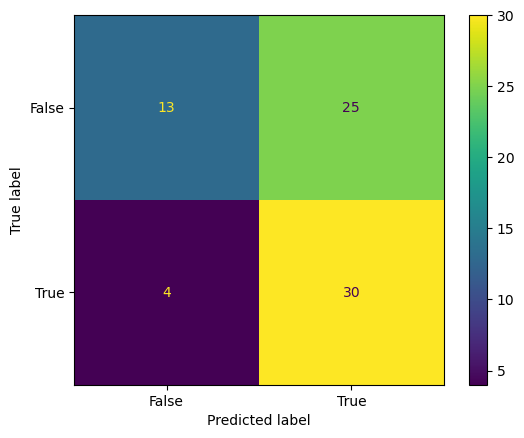

In [39]:
svc_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svc_conf_matrix, display_labels = [False, True])

svc_cm_display.plot()
plt.show()

In [20]:
print("accuracy: %f " % accuracy_score(svc_pred, y_test))
print("MAE: %f" % mean_absolute_error(svc_pred, y_test))
print("F1: %f" % f1_score(svc_pred, y_test))

accuracy: 0.597222 
MAE: 0.402778
F1: 0.674157


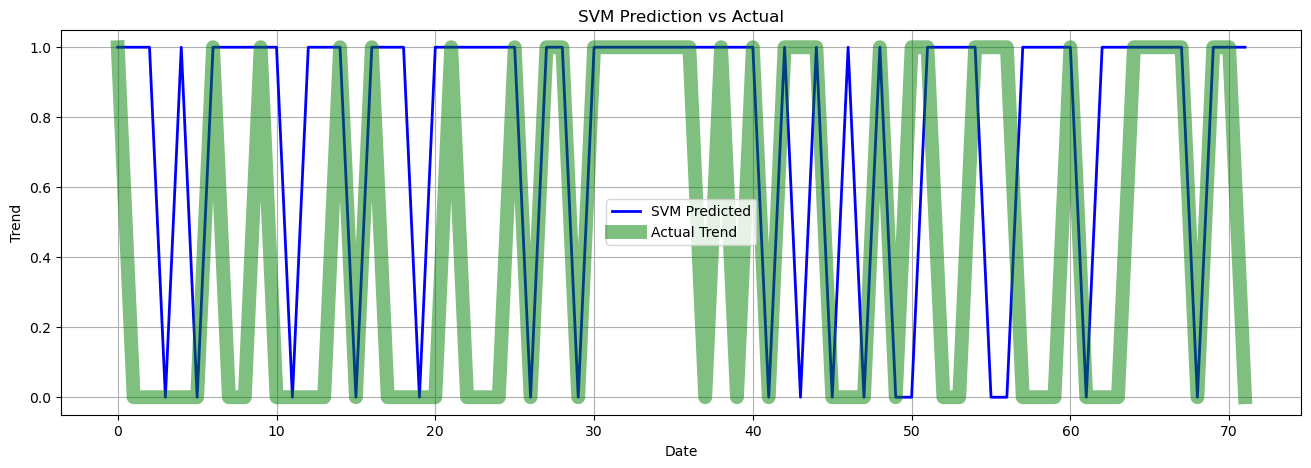

In [54]:
# Plotting SVM predicted vs Actual
plt.figure(figsize=(16,5))
plt.grid(True)
plt.plot(svc_pred, color = 'blue', linewidth=2, label = 'SVM Predicted')
plt.plot(y_test, color = 'green', label = 'Actual Trend', alpha=0.5, linewidth=10)
plt.title('SVM Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.show()

## Logistic regression

In [41]:
# fir logistic regression model
logReg = LogisticRegression(C=0.02, solver='liblinear').fit(X_train,y_train)

In [42]:
# Model predict
lr_pred = logReg.predict(X_test)

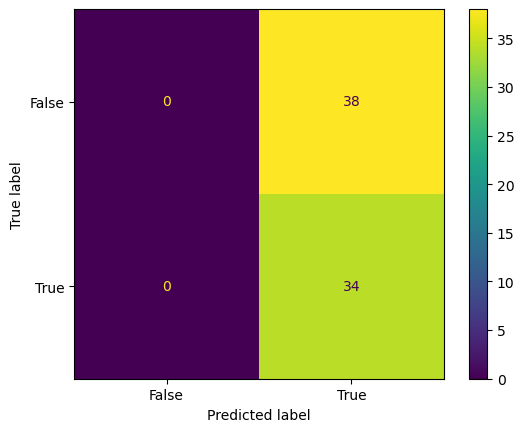

In [43]:
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
lr_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_conf_matrix, display_labels = [False, True])
lr_cm_display.plot()
plt.show()

In [44]:
print("accuracy:", accuracy_score(lr_pred, y_test))
print("MAE:", mean_absolute_error(lr_pred, y_test))
print("F1:", f1_score(lr_pred, y_test))

accuracy: 0.4722222222222222
MAE: 0.5277777777777778
F1: 0.6415094339622641


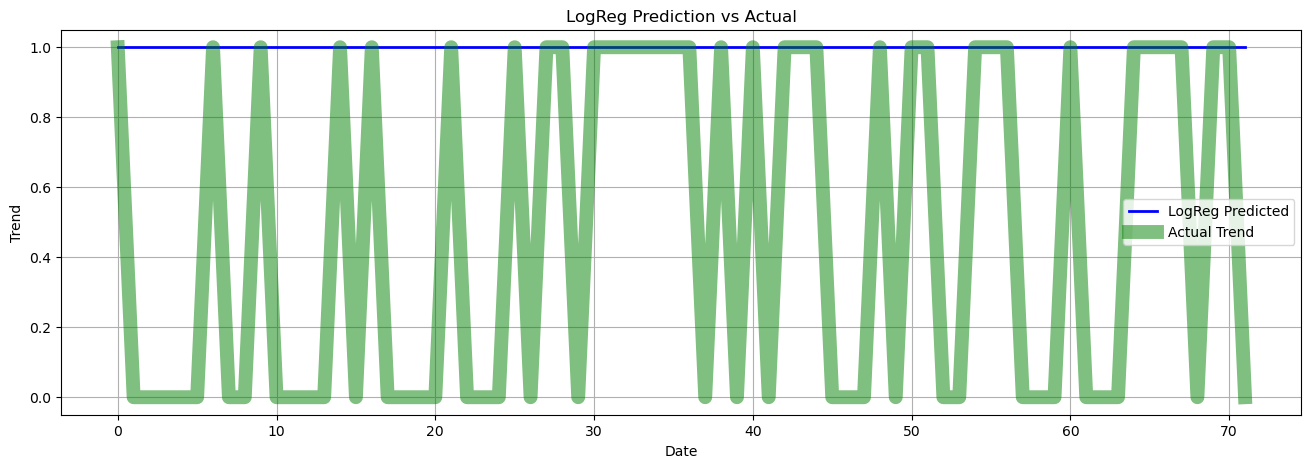

In [56]:
# Plotting Naive Bayes predicted vs Actual
plt.figure(figsize=(16,5))
plt.grid(True)
plt.plot(lr_pred, color = 'blue', linewidth=2, label = 'LogReg Predicted')
plt.plot(y_test, color = 'green', label = 'Actual Trend', alpha=0.5, linewidth=10)
plt.title('LogReg Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.show()

## Naive Bayes

In [31]:
# Fit Naive bayes model
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [32]:
# Model predict
nb_pred = nb.predict(X_test)

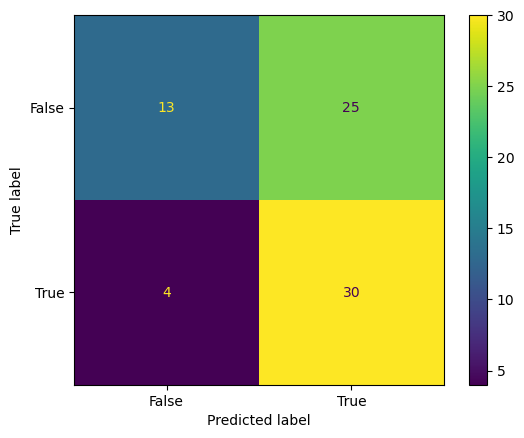

In [33]:
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
nb_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = nb_conf_matrix, display_labels = [False, True])
nb_cm_display.plot()
plt.show()

In [34]:
print("accuracy:", accuracy_score(nb_pred, y_test))
print("MAE:", mean_absolute_error(nb_pred, y_test))
print("F1:", f1_score(nb_pred, y_test))

accuracy: 0.5972222222222222
MAE: 0.4027777777777778
F1: 0.6741573033707865


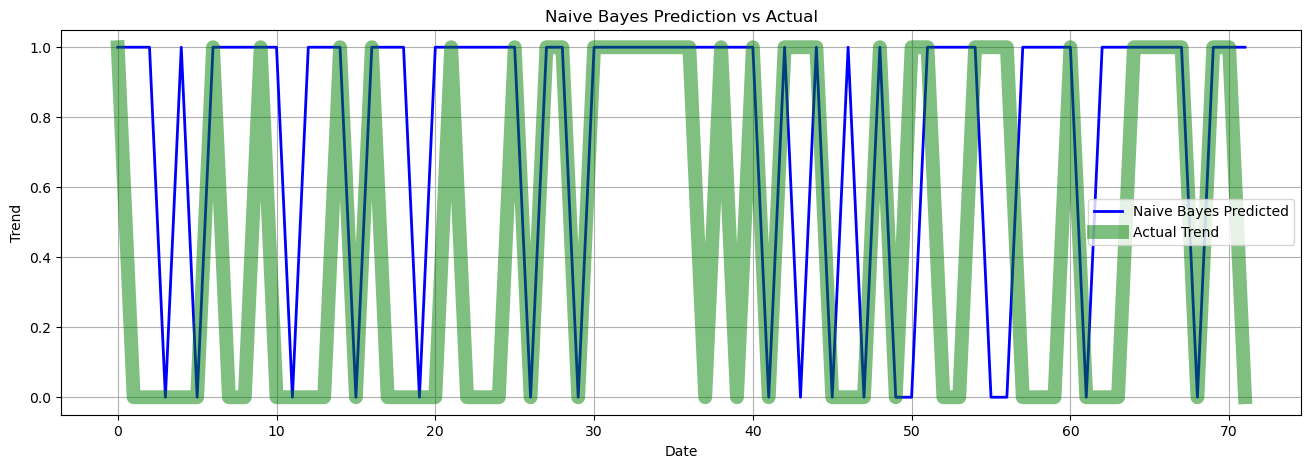

In [55]:
# Plotting Naive Bayes predicted vs Actual
plt.figure(figsize=(16,5))
plt.grid(True)
plt.plot(nb_pred, color = 'blue', linewidth=2, label = 'Naive Bayes Predicted')
plt.plot(y_test, color = 'green', label = 'Actual Trend', alpha=0.5, linewidth=10)
plt.title('Naive Bayes Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.show()